# (1)

In [ ]:
# Answer:

# D O N
# T P A
# N I C

# (2)

In [123]:
import pandas as pd
import seaborn as sns

In [124]:
data = pd.read_csv("data_for_task2.csv")
data

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [125]:
data_avg = data.groupby(['genus'])\
    .aggregate({'sucrose': 'mean', 'alanin': 'mean', 'citrate': 'mean',\
                'glucose': 'mean', 'oleic_acid': 'mean'})
data_avg

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [126]:
data_avg['genus'] = data_avg.index
data_long = pd.melt(frame = data_avg, id_vars = "genus")
data_long

,genus,variable,value
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


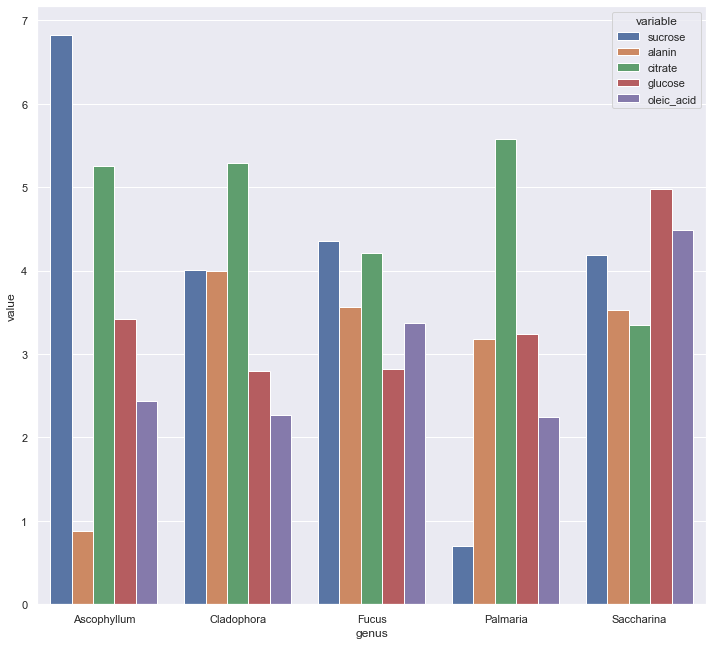

In [127]:
sns.set( rc = {'figure.figsize':(12,11)} )
sns.barplot(x = "genus",
            y = "value", 
            hue = "variable", 
            data = data_long)

# (3)

In [128]:
my_iter = map(lambda item: item % 3 == 0, [1,2,3,4,5,6])
while True: 
    print(next(my_iter))
    
#observing StopIteration error:

False
False
True
False
False
True


StopIteration: 

In [129]:
my_iter = map(lambda item: item % 3 == 0, [1,2,3,4,5,6])

#catching StopIteration error:

while True:
    try: 
        print(next(my_iter))
    except StopIteration:
        break

False
False
True
False
False
True


Iterators are more preferable than lists in cases when we need to iterate through large objects without loading them to memory all at once (have memory and time limitations).

When we use list(map(...)) syntax, we create a new list to store calculation results for each item of an iterable object, while we might not need all these results for all items. With iterator, we could manually control iterations and save results only when we need them.


# (4)

In [130]:
import requests

In [131]:
numbers = (22, 43, 264, 1990)
types = ("math", "year")

for t in types:
    for n in numbers:
        URL = f"http://numbersapi.com/{n}/{t}"
        result = requests.get(URL)
        if result.ok:
            if t == "math":
                print("MATH: ", result.text)
            else:
                print("HIST: ", result.text)

MATH:  22 is an even composite number, its proper divisors being 1, 2 and 11.
MATH:  43 is a repdigit in base 6 (111).
MATH:  264 is the largest known number whose square is undulating.
MATH:  1990 is a stella octangula number.
HIST:  22 is the year that Drusus Julius Caesar receives the tribunicia potestas (tribunician power).
HIST:  43 is the year that Vietnam is designated a province of China.
HIST:  264 is the year that Jiang Wei tries to restore the Kingdom of Shu by persuading Zhong Hui to declare a rebellion against Sima Zhao, ruler of Cao Wei.
HIST:  1990 is the year that the first constitution of the Republic of Croatia is adopted.


# (5)

In [132]:
from cobra import test

In [133]:
model = test.create_test_model("textbook") 
nadh_norm = sum(model.metabolites.nadh_c.summary(fva = 0.95).producing_flux['flux'])
print('NADH production in cytosol (normal): ', nadh_norm)

NADH production in cytosol (normal):  38.53460965051545


In [134]:
getattr(model.genes, "b3236").knock_out() 
model.optimize()
nadh_ko = sum( model.metabolites.nadh_c.summary(fva = 0.95).producing_flux['flux'])
print('NADH production in cytosol (b3236 knock-out): ', nadh_ko)

NADH production in cytosol (b3236 knock-out):  40.355449482420006


In [135]:
# What has changed in NADH production in cytosol?

print("Total NADH production in cytosol has increased by", nadh_ko - nadh_norm, "after b3236 gene knock-out")

Total NADH production in cytosol has increased by 1.8208398319045571 after b3236 gene knock-out
